# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №1 - Метод k-средних, предобработка признаков


# <hr\>
**Общая информация**

**Срок сдачи:** до 7 октября 2017, 06:00   
**Штраф за опоздание:** -2 балла после 06:00 7 октября, -4 балла после 06:00 14 октября, -6 баллов после 06:00 21 октября

При отправлении ДЗ указывайте фамилию в названии файла   


Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush
Необходимо в slack создать таск в приватный чат:   
/todo Фамилия Имя *ссылка на гитхаб* @alkhamush   
Пример:   
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush   

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

# Первое задание - указать фамилию в имени файла

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 5)

# Пролог: Модуль sklearn
На наших практических занятиях мы будем использовать [sklearn](http://scikit-learn.org/stable/index.html) (scikit-learn) - наиболее популярный модуль для работы с методами машинного обучения и анализа данных.

Этот модуль регулярно обновляется, расширяется и сопровождается примерами использования тех или иных методов. Помимо самих алгоритмов (например k-средних или линейной регрессии) в нем есть множество вспомогательных функций по работе с данными.

# Туториал: Работа с различными типами признаков

Вспомним какие типы признаков могут встретится при описании объектов исследования и как их представить в доступной для обработки компьтером форме

Типы признаков мы будем рассматривать на примере довольно популярного набора данных [titanic](https://www.kaggle.com/c/titanic/download/train.csv) - информации о выживаемости пассажиров после известной трагедии корабля Titanic.

In [3]:
df_titanic = pd.read_csv("train.csv", sep=",").dropna()
df_titanic.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S

## Бинарные признаки
Это признаки с двумя возможными значениями
* Пол (мужской, женский)
* Выжил (да, нет)

На вход в алгоритмы обычно подаются в виде значений `{0, 1}` (реже в виде `{-1, 1}`)

In [4]:
# Здесь все нормально
df_titanic.Survived.value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [5]:
# Тут стоит выполнить переобознаение
df_titanic.Sex.value_counts()

male      95
female    88
Name: Sex, dtype: int64

In [6]:
# Например так
df_titanic.Sex = df_titanic.Sex.replace({"male": 0, "female": 1})
df_titanic.Sex.value_counts()

0    95
1    88
Name: Sex, dtype: int64

## Вещественные признаки

* Возраст
* Сумма, потраченная на билет
* Количество родственников на борту

Как правило остаются в том же виде или выполняется **нормализация** признаков, т.е. переход к одинаковой шкале, например:

* $\tilde{x} = \frac{x - \text{mean}(x)}{\text{std}(x)}$
* $\tilde{x} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$

## Категориальные признаки

Принимают значения из *неупорядоченного* множества

* Порт погрузки (C = Cherbourg; Q = Queenstown; S = Southampton)
* Точка отправления (St Louis, MO; Montreal, PQ; .. }
* Точка назначения (Chesterville, ON; Roseville, IL; .. }

Обычно такие признаки кодируют с помощью так называемого One Hot Encoding: </br>
для каждой категории создается бинарная маска-столбец, в которой стоит `1` если значение признака равно значению соответствующей категории категории.

Например, для признака "порт погрзки" создается бинарная макска из трех стобцов для каждого из портов: С, Q, S<br/>
Если пассажир заходил на кораблю в порту Southampton, то его признаковое описание будет соответственно: `[0, 0, 1]`

In [7]:
df_titanic  # .Embarked.head()

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
21            22         1       2   
23            24         1       1   
27            28         0       1   
52            53         1       1   
54            55         0       1   
62            63         0       1   
66            67         1       2   
75            76         0       3   
88            89         1       1   
92            93         0       1   
96            97         0       1   
97            98         1       1   
102          103         0       1   
110          111         0       1   
118          119         0       1   
123          124         1       2   
124          125         0       1   
136          137         1       1   
137          138         0       1   
139          140         0       1   
148          149         0       2   
151          152         1       1   
170          171         0       1   
174          175         0       1   
177          178         0       1   
..           ...       ...     ...   
737          738         1       1   
741          742         0       1   
742          743         1       1   
745          746         0       1   
748          749         0       1   
751          752         1       3   
759          760         1       1   
763          764         1       1   
765          766         1       1   
772          773         0       2   
779          780         1       1   
781          782         1       1   
782          783         0       1   
789          790         0       1   
796          797         1       1   
802          803         1       1   
806          807         0       1   
809          810         1       1   
820          821         1       1   
823          824         1       3   
835          836         1       1   
853          854         1       1   
857          858         1       1   
862          863         1       1   
867          868         0       1   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name  Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
6                              McCarthy, Mr. Timothy J    0  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut    1   4.0      1   
11                            Bonnell, Miss. Elizabeth    1  58.0      0   
21                               Beesley, Mr. Lawrence    0  34.0      0   
23                        Sloper, Mr. William Thompson    0  28.0      0   
27                      Fortune, Mr. Charles Alexander    0  19.0      3   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)    1  49.0      1   
54                      Ostby, Mr. Engelhart Cornelius    0  65.0      0   
62                         Harris, Mr. Henry Birkhardt    0  45.0      1   
66                        Nye, Mrs. (Elizabeth Ramell)    1  29.0      0   
75                             Moen, Mr. Sigurd Hansen    0  25.0      0   
88                          Fortune, Miss. Mabel Helen    1  23.0      3   
92                         Chaffee, Mr. Herbert Fuller    0  46.0      1   
96                           Goldschmidt, Mr. George B    0  71.0      0   
97                     Greenfield, Mr. William Bertram    0  23.0      0   
102                          White, Mr. Richard Frasar    0  21.0      0   
110                     Porter, Mr. Walter Chamberlain    0  47.0      0   
118                           Baxter, Mr. Quigg Edmond    0  24.0      0   
123                                Webber, Miss. Sus

In [8]:
# Сделать в python это можно несколькими способами:

# 1: Через pandas (не очень рекомендуется)
emb = pd.get_dummies(df_titanic.Embarked, prefix="Embarked", prefix_sep="=")
emb.head()

Embarked=C  Embarked=Q  Embarked=S
1            1           0           0
3            0           0           1
6            0           0           1
10           0           0           1
11           0           0           1

In [9]:
# 2: Функционал sklearn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

emb = df_titanic.loc[:, ["Embarked"]].replace({"C": 0, "Q": 1, "S": 2}).values
emb_enc = encoder.fit_transform(emb)
emb_enc[:5]

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

Про другием способы работы с категориальными переменными можно прочитать вот [тут](https://alexanderdyakonov.wordpress.com/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

## Порядковый признаки

Принимают значения из *упорядоченного* множества

* Класс каюты (1 > 2 > 3)

В зависимости от метода остаются можно оставить в исходном виде или применить OneHotEncoding.

## Текстовые признаки - Bag of words

Для демонстрации возьмем текст стихотворения Блока:

Ночь, улица, фонарь, аптека,<br/>
Бессмысленный и тусклый свет.<br/>
Живи еще хоть четверть века -<br/>
Все будет так. Исхода нет.<br/>

Умрешь - начнешь опять сначала<br/>
И повторится все, как встарь:<br/>
Ночь, ледяная рябь канала,<br/>
Аптека, улица, фонарь.<br/>

Пусть каждая строчка - это будет условный документ. Переведем эти документы в числовое представление по методу мешка слов (Bag Of Words)

In [224]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Ночь, улица, фонарь, аптека,",
    "Бессмысленный и тусклый свет.",
    "Живи еще хоть четверть века -",
    "Все будет так. Исхода нет.",
    "Умрешь - начнешь опять сначала",
    "И повторится все, как встарь:",
    "Ночь, ледяная рябь канала,",
    "Аптека, улица, фонарь.",
]

In [11]:
vect = CountVectorizer()

bow = vect.fit_transform(corpus)
bow = bow.toarray()
bow.shape

(8L, 27L)

Получили матрицу размера $8 \times 27$, так как у нас 8 строчек и выделилось 27 униальных слов. Элемент матрицы показывает сколько раз слово встречалось в соответствующем документе.

In [12]:
bow

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0]], dtype=int64)

In [13]:
# Посмотрим какие слова стоят по столбцам
for i, w in enumerate(vect.get_feature_names()):
    print u'столбец %d: %s' % (i, w)

столбец 0: аптека
столбец 1: бессмысленный
столбец 2: будет
столбец 3: века
столбец 4: все
столбец 5: встарь
столбец 6: еще
столбец 7: живи
столбец 8: исхода
столбец 9: как
столбец 10: канала
столбец 11: ледяная
столбец 12: начнешь
столбец 13: нет
столбец 14: ночь
столбец 15: опять
столбец 16: повторится
столбец 17: рябь
столбец 18: свет
столбец 19: сначала
столбец 20: так
столбец 21: тусклый
столбец 22: улица
столбец 23: умрешь
столбец 24: фонарь
столбец 25: хоть
столбец 26: четверть


# Туториал: Имплементация собственного метода

Для решения задач вида "имплементируйте метод X" крайне желательно (но необязательно) реализовывать методы с помощью интерфейса sklearn. Ниже вы увидите пример очень простого **классификатора**. Используйте эти наработи для выполнения задания.

Загрузите [датасет](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) с информацией о характеристиках вина и его качестве. (В метод `pd.read_csv()` можно подать веб-ссылку на данные и пандас их скачает и преобразует в `DataFrame`).

In [14]:
import pandas as pd

In [15]:
df_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=";",
)

In [16]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Наша задача состоит в предсказании целевого признака `quality` по остальным признакам. `quality` - это вещественная переменная (оценка качества от 0 до 10). Упростим себе задачу - создадим новый столбец `quality_cat` по следующим правилам:

* `quality_cat = 1` если `quality > 5` 
* `quality_cat = 0` - иначе 

Таким образом, `quality_cat` характерует "плохое" и "хорошее" вино.

In [17]:
def prepocess_wine(df):
    df.loc[:, "quality_cat"] = (df.loc[:, "quality"] > 5).astype(int)
    df = df.drop("quality", axis=1)

    return df

In [18]:
df_wine = df_wine.pipe(prepocess_wine)
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality_cat  
0      9.4            0  
1      9.8            0  
2      9.8            0  
3      9.8            1  
4      9.4            0

Нарисуем распределение хорошего и плохого вина по признаку `alcohol`.

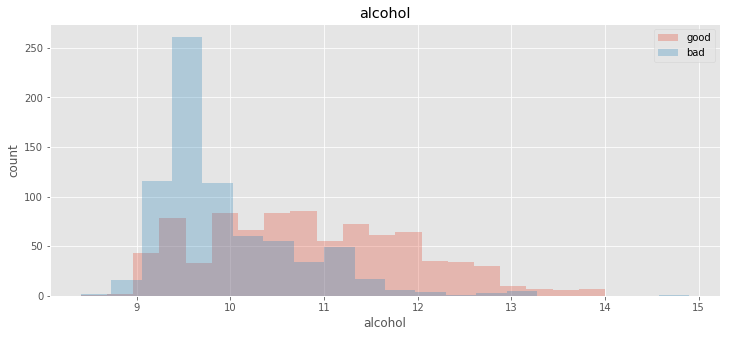

In [19]:
_, ax = plt.subplots(1, 1)
df_wine.query("quality_cat == 1").hist(
    "alcohol", alpha=0.3, bins=20, label="good", ax=ax
)
df_wine.query("quality_cat == 0").hist(
    "alcohol", alpha=0.3, bins=20, label="bad", ax=ax
)
ax.set_xlabel("alcohol")
ax.set_ylabel("count")
plt.legend()

Визуально кажется, что можно найти некоторое пороговое значение признака `alcohol` $\theta$, чтобы хорошо дискриминировать между плохими и хорошим вином:
* Если `alcohol >` $\theta$ - то предсказываем, что вино хорошее
* Если `alcohol <=` $\theta$ - то предсказываем, что вино плохое

Обучаеть классификатор будем очень просто: перебирать значения признака alchol и считать **ошибку** классификации. То значение, где ошибка минимальна и будет оптимальным.

Разделим целевой признак от остальных признаков

In [20]:
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values

Далее вы увидете пример реализации этого простого классификатора.

In [21]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [22]:
class SimpleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        """
        Инициализация метода
        """

        self.threshold = 0

    def fit(self, X, y=None):
        """
        Выполняет процедуру обучения классификатора. В данном случае - перебор занчения признака alcohol.
        Договоримся, что признак alcohol будет в последнем столбце матрицы X
        """

        alcohol = X[:, -1]
        n = float(y.shape[0])

        # Задаем пространство поиска
        alco_range = np.arange(alcohol.min(), alcohol.max(), 0.1)

        min_error_rate = 1

        #  Начинаем поиск
        for theta in alco_range:
            prediction = alcohol > theta

            error_rate = sum(prediction != y) / n

            if error_rate < min_error_rate:
                min_error_rate = error_rate
                self.threshold = theta

        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания класса по обученному порогу
        """

        return (X[:, -1] > self.threshold).astype(int)

Обучаем модель

In [23]:
model = SimpleClassifier()
model.fit(X, y)

print 'Оптимальный порог: %f' % model.threshold

Оптимальный порог: 10.000000


Получаем предсказание модели (на обучающей выборке)

In [24]:
y_hat = model.predict(X)

Оценим долю ошибок на обучающей выборке

In [25]:
error_rate = sum(y_hat != y)/float(y.shape[0])
print 'Доля ошибок на обучающей выборке: %f' % error_rate

Доля ошибок на обучающей выборке: 0.295184


## Проверка метода на контрольной выборке

Мы обучили наш метод на данных о красном виде. 

Посмотрим, выполняется ли так же хорошо закономерность между качеством и уровнем алкоголя в белом вине.

In [26]:
df_wine_test = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    sep=";",
)

df_wine_test = df_wine_test.pipe(prepocess_wine)
df_wine_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality_cat  
0      8.8            1  
1      9.5            1  
2     10.1            1  
3      9.9            1  
4      9.9            1

In [27]:
X_test, y_test = df_wine_test.iloc[:, :-1].values, df_wine_test.iloc[:, -1].values
y_hat = model.predict(X_test)

In [28]:
error_rate = sum(y_hat != y_test)/float(y_test.shape[0])
print 'Доля ошибок на контрольной выборке: %f' % error_rate

Доля ошибок на контрольной выборке: 0.312577


Получилось неплохо и это лишь наивный алгоритм на одном признаке! Ну а выводы делайте сами =)

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). Для этого рекомендуется использовать инструмент %timeit. График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [67]:
a = np.asarray([1, 2])

In [132]:
from sklearn.base import ClusterMixin


class Kmeans(BaseEstimator, ClusterMixin):
    def __init__(
        self,
        k=2,
        metric="euclidean",
        epsilon=10 ** (-5),
        max_iter=1000,
        random_state=None,
        init="random",
    ):
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.init = init

    def fit_run(self):
        for _ in range(self.max_iter):
            finish = True
            broad = self.centroids.reshape(self.k, 1, self.X.shape[1])
            self.labels = ((self.d - broad) ** 2).sum(axis=2).argmin(axis=0)
            for i in range(self.k):
                cluster_members = self.X[self.labels == i]
                if cluster_members.any():
                    new_center = cluster_members.mean(axis=0)
                    if ((new_center - self.centroids[i]).max() > self.epsilon) or (
                        (new_center - self.centroids[i]).min() < -self.epsilon
                    ):
                        finish = False
                    self.centroids[i] = new_center
            if finish:
                return self

    def fit(self, X, y=None):
        np.random.seed(self.random_state)

        self.labels = np.empty(X.shape[0])

        self.centroids = np.empty((self.k, X.shape[1]))

        self.X = X
        self.d = np.empty((self.k, self.X.shape[0], self.X.shape[1]))
        for i in range(self.k):
            self.d[i] = self.X.copy()
        self.distances_to_centers = np.empty((self.X.shape[0], self.k))
        if self.init == "random":
            t0 = time.clock()
            for i, value in enumerate(
                np.random.choice(range(0, X.shape[0]), self.k, replace=False)
            ):
                self.centroids[i] = X[value]
            t1 = time.clock()
        elif self.init == "k-means":
            batch = X[np.random.randint(0, X.shape[0], 50 * self.k)]
            self.centroids[0] = batch[0]
            prob = np.empty(batch.shape[0])
            batch_to_centers = np.empty((batch.shape[0], 1))
            t0 = time.clock()
            for i in range(1, self.k):
                for j in range(i):
                    batch_to_centers[:, j] = ((batch - self.centroids[j]) ** 2).sum(
                        axis=1
                    )
                prob = batch_to_centers.min(axis=1)
                batch_to_centers = np.empty((batch.shape[0], i + 1))
                self.centroids[i] = batch[
                    np.random.choice(range(batch.shape[0]), p=(prob / prob.sum()))
                ]
            t1 = time.clock()
        else:
            raise Exception("{} is not a valid init method".format(self.init))
        self.fit_run()
        return t1 - t0

    def predict(self, X, y=None):
        self.fit(X, y)
        return self.labels


class MiniBatchKMeans(Kmeans):
    def __init__(
        self,
        k=2,
        metric="euclidean",
        epsilon=10 ** (-3),
        max_iter=100,
        random_state=None,
        init="random",
        batch_size=100,
    ):
        super(MiniBatchKMeans, self).__init__(
            k=k,
            metric=metric,
            epsilon=epsilon,
            max_iter=max_iter,
            random_state=random_state,
            init=init,
        )
        self.batch_size = batch_size

    def fit_run(self):
        self.labels = np.full(self.X.shape[0], -1)
        self.counts = np.zeros(self.k)
        for it in range(self.max_iter * self.X.shape[0] / self.batch_size):
            finish = True
            broad = self.centroids.reshape(self.k, 1, self.X.shape[1])
            batch_ids = np.random.randint(0, self.X.shape[0], self.batch_size)
            batch = self.d[:, batch_ids, :]
            self.labels[batch_ids] = ((batch - broad) ** 2).sum(axis=2).argmin(axis=0)
            for i in range(self.k):
                cluster_members = self.X[batch_ids][self.labels[batch_ids] == i]
                if cluster_members.any():
                    self.counts[i] += 1
                    new_center = (1.0 - 0.8 / self.counts[i]) * self.centroids[
                        i
                    ] + 0.8 / self.counts[i] * cluster_members.mean(axis=0)
                    if ((new_center - self.centroids[i]).max() > self.epsilon) or (
                        (new_center - self.centroids[i]).min() < -self.epsilon
                    ):
                        finish = False
                    self.centroids[i] = new_center
            if finish:
                break
        self.labels = ((self.d - broad) ** 2).sum(axis=2).argmin(axis=0)
        return self

    def fit(self, X, y=None):
        return super(MiniBatchKMeans, self).fit(X, y)

    def predict(self, X, y=None):
        self.fit(X, y)
        return self.labels

In [179]:
# %load_ext line_profiler
model = MiniBatchKMeans(k=9, init="k-means")
%lprun -f model.fit_run model.fit(df_sns.values)

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [42]:
from sklearn.datasets import make_blobs

In [43]:
X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=False,
    random_state=1234,
)

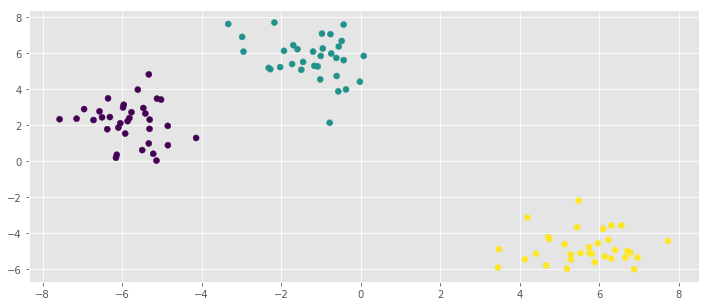

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта задание не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [45]:
import time


class Timer:
    def __init__(self):
        self.results = []

    def __enter__(self):
        self.start = time.clock()

    def __exit__(self, exception_type, exception_value, traceback):
        self.end = time.clock()
        self.results.append(self.end - self.start)

    def results(self):
        return self.results

In [46]:
def print_results(model, n_tests=20):
    fig, axis = plt.subplots(
        ncols=2, nrows=(n_tests + 1) // 2, figsize=(10, 5 * (n_tests + 1) // 2)
    )
    for i in range(n_tests):
        X, y = make_blobs(
            n_samples=(1 + i) * 100,
            n_features=2,
            centers=3,
            cluster_std=1,
            center_box=(-10.0, 10.0),
            shuffle=False,
            random_state=1234,
        )
        labels = model.predict(X)
        ax = axis[i // 2][i % 2]
        ax.scatter(X[:, 0], X[:, 1], c=labels)
        ax.set_title("clustering of {} samples".format((i + 1) * 100))
        for i in model.centroids:
            ax.scatter(*i, c="orange")

    fig.tight_layout()

In [47]:
def print_timings(model, n_tests=50):
    timer = Timer()
    delta = []
    for i in range(n_tests):
        X, y = make_blobs(
            n_samples=(1 + i) * 100,
            n_features=2,
            centers=3,
            cluster_std=1,
            center_box=(-10.0, 10.0),
            shuffle=False,
            random_state=1234,
        )
        with timer:
            t = model.fit(X)
        delta.append(t)
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6))

    ax0.set_title(
        "{} tests: avg {} per test (full time)".format(
            n_tests, np.asarray(timer.results).mean()
        )
    )
    ax0.set_xlabel("hundreds of samples")
    ax0.set_ylabel("seconds")
    ax0.set_xticks(
        [(1 + i) for i in range(len(timer.results)) if ((1 + i) % 5 == 0) or i == 0]
    )
    ax0.plot([(1 + i) for i in range(len(timer.results))], timer.results)
    ax1.set_title(
        "{} tests: avg {} per test (without initialization)".format(
            n_tests, np.asarray(timer.results).mean() - np.asarray(delta).mean()
        )
    )
    ax1.set_xlabel("hundreds of samples")
    ax1.set_ylabel("seconds")
    ax1.set_xticks(
        [(1 + i) for i in range(len(timer.results)) if ((1 + i) % 5 == 0) or i == 0]
    )
    ax1.plot(
        [(1 + i) for i in range(len(timer.results))],
        [j - delta[i] for i, j in enumerate(timer.results)],
    )

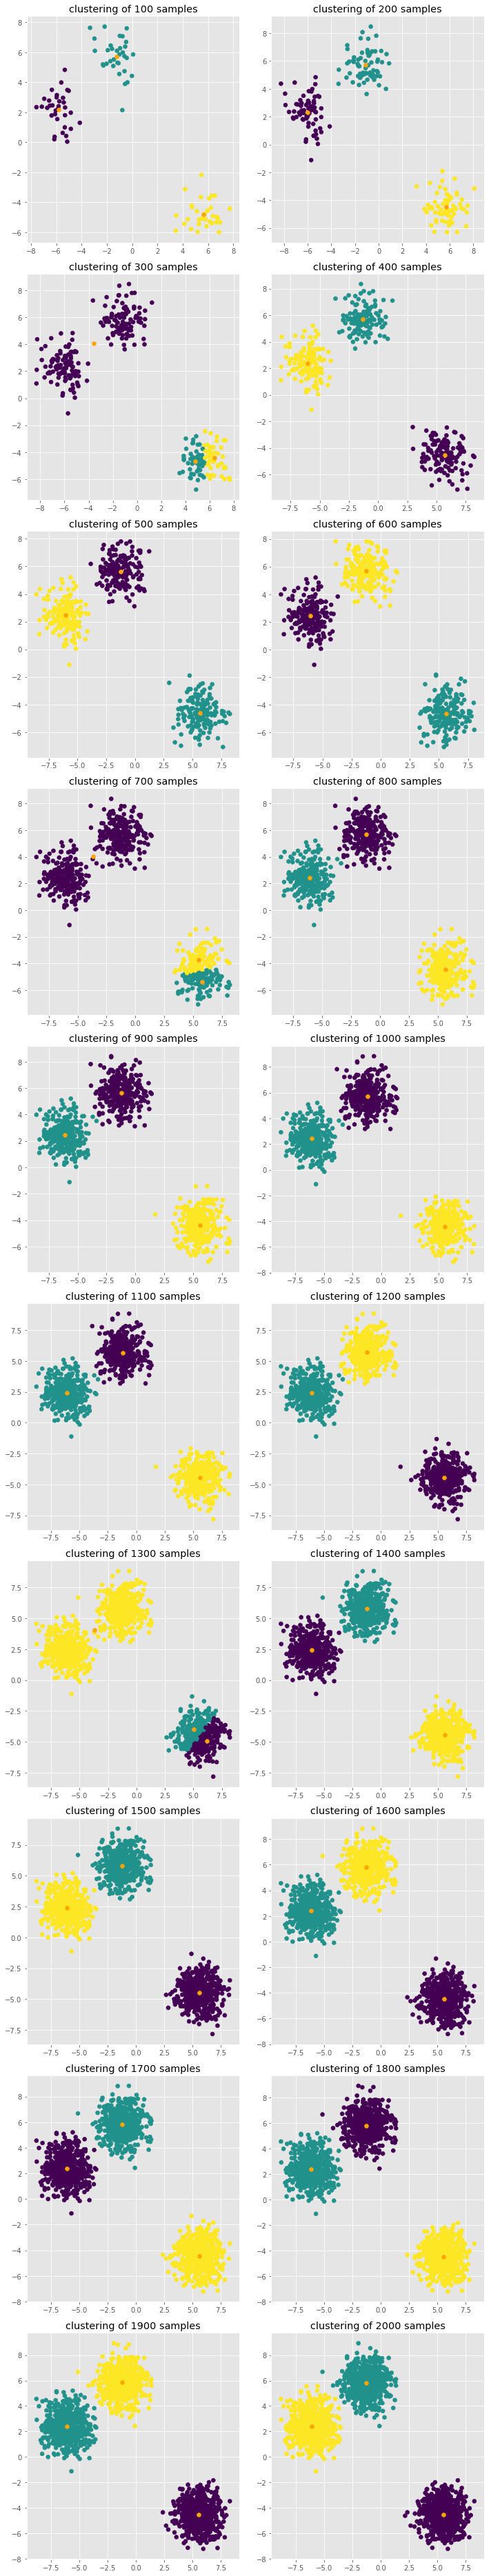

In [171]:
## Работоспособность KMeans
print_results(Kmeans(k=3))

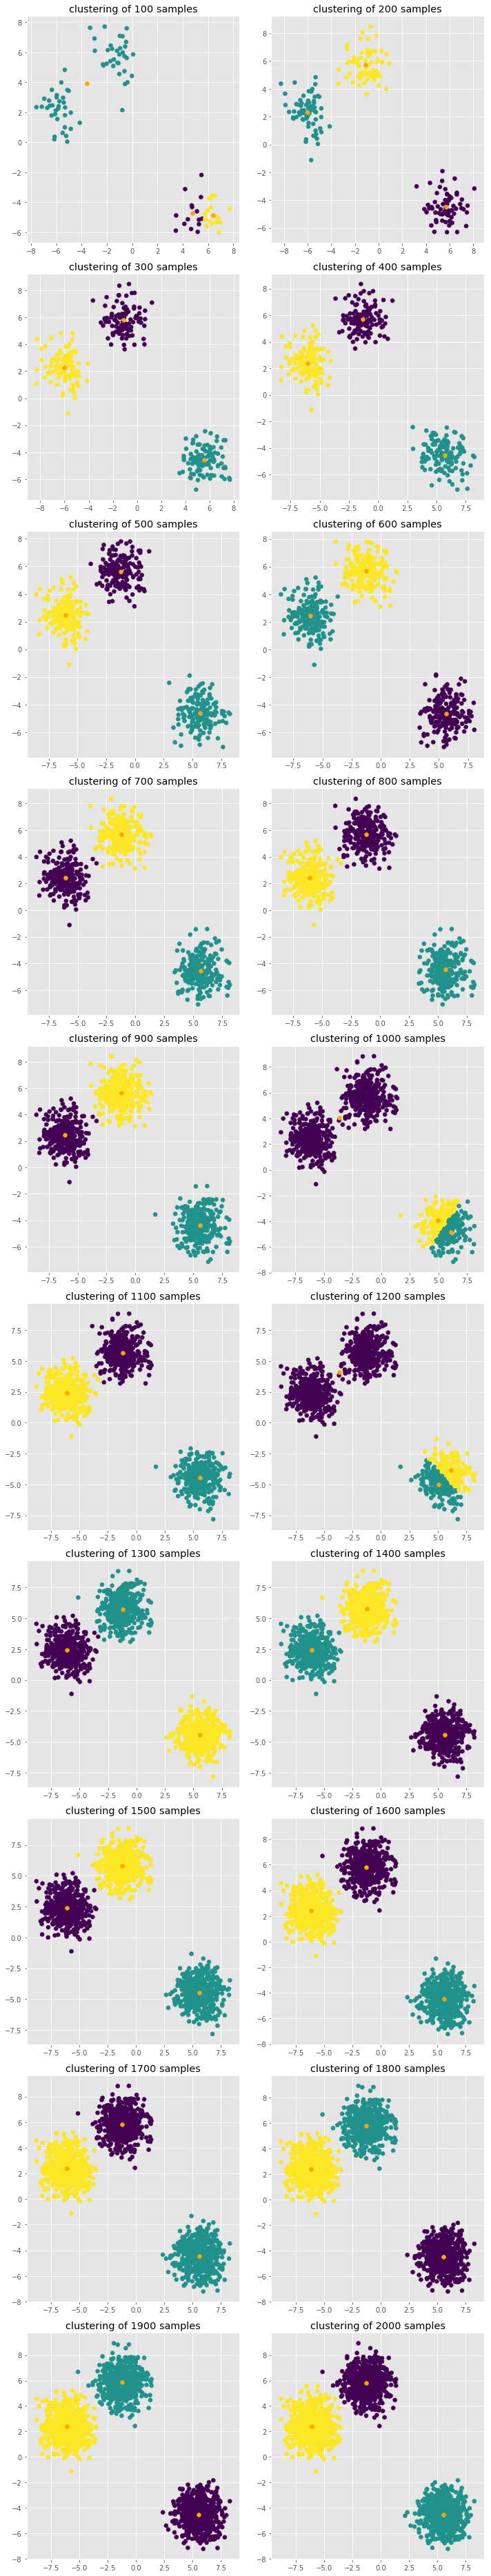

In [172]:
## Работоспособность KMeans++
print_results(Kmeans(k=3, init="k-means"))

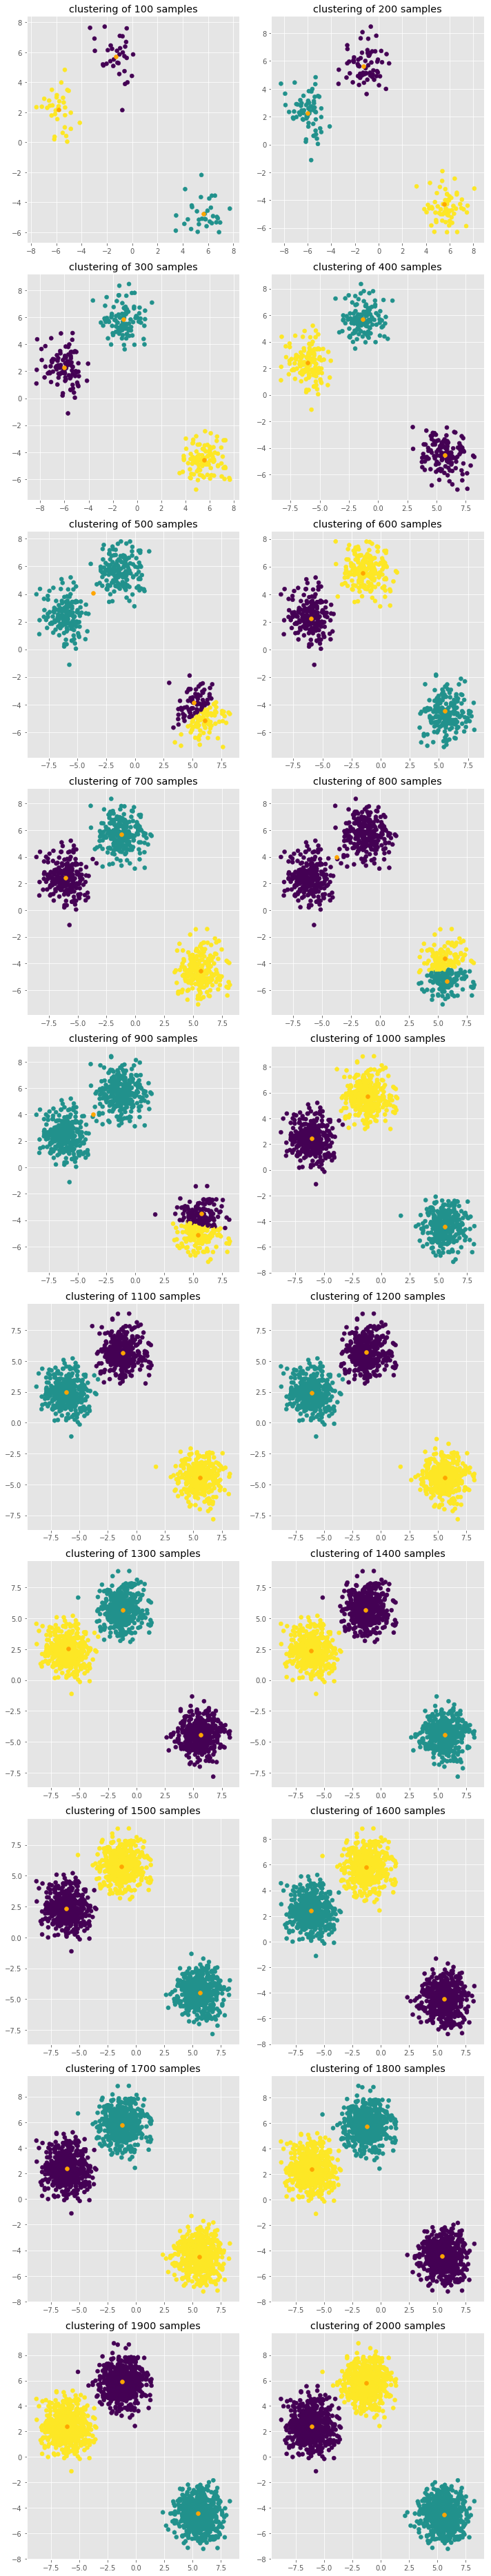

In [173]:
## Работоспособность KMeans с MiniBatchKMeans
print_results(MiniBatchKMeans(k=3))

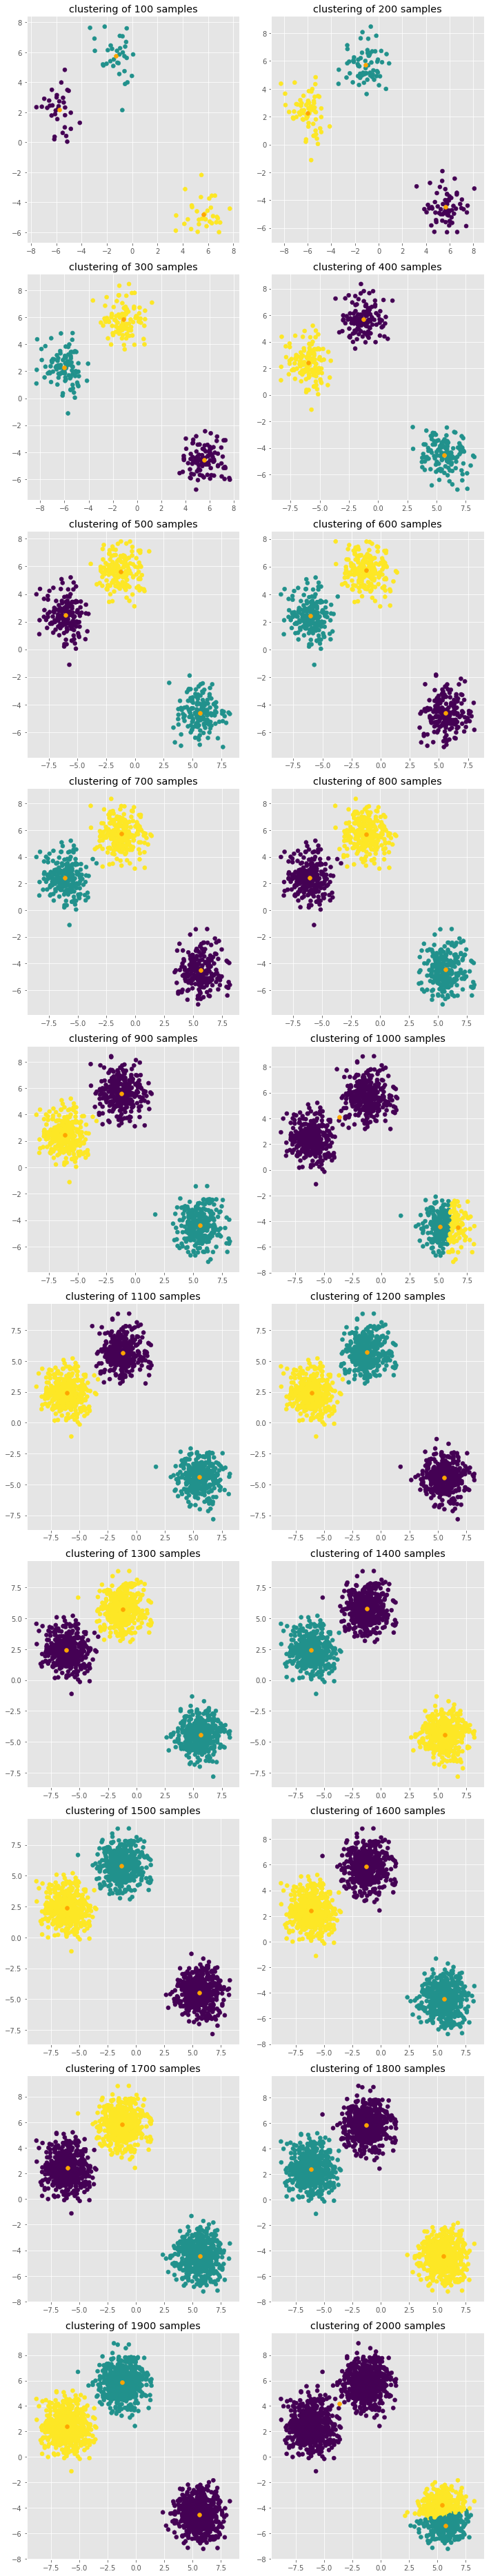

In [174]:
## Работоспособность KMeans++ с MiniBatchKMeans
print_results(MiniBatchKMeans(k=3, init="k-means"))

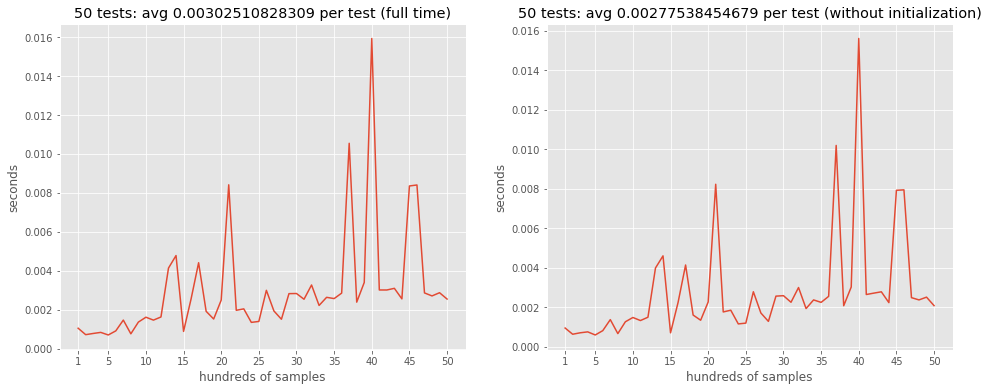

In [175]:
## Время выполнения алгоритма KMeans
print_timings(Kmeans(k=3))

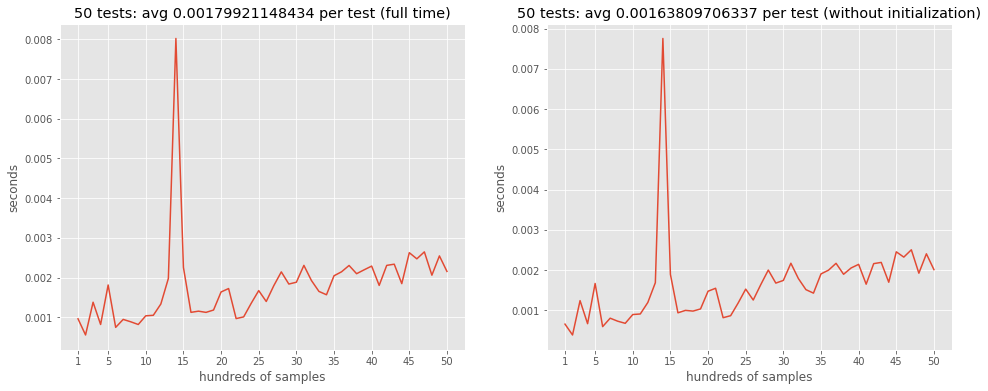

In [176]:
## Время выполнения алгоритма KMeans++
print_timings(Kmeans(k=3, init="k-means"))  # , n_tests=2)

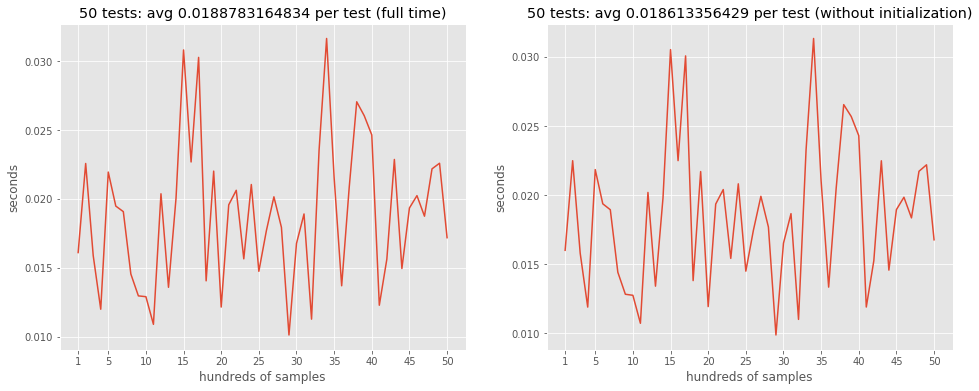

In [177]:
## Время выполнения алгоритма KMeans с MiniBatchKMeans
print_timings(MiniBatchKMeans(k=3))

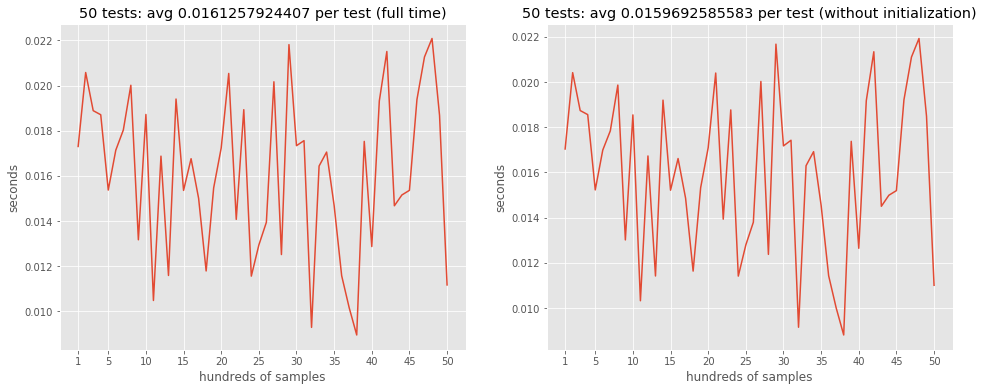

In [178]:
## Время выполнения алгоритма  KMeans++ с MiniBatchKMeans
print_timings(MiniBatchKMeans(k=3, init="k-means"))

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [215]:
df_sns = pd.read_csv(
    "https://raw.githubusercontent.com/brenden17/sklearnlab/master/facebook/snsdata.csv",
    sep=",",
)

In [216]:
df = df_sns.copy()
df_sns.drop(df_sns.columns[:4], axis=1, inplace=True)
for i in df_sns:
    df_sns[i] = (df_sns[i] - df_sns[i].mean()) / df_sns[i].std()
df_sns.head()

basketball  football   soccer  softball  volleyball  swimming  \
0   -0.332212 -0.357691 -0.24287 -0.217924   -0.223666 -0.259966   
1   -0.332212  1.060031 -0.24287 -0.217924   -0.223666 -0.259966   
2   -0.332212  1.060031 -0.24287 -0.217924   -0.223666 -0.259966   
3   -0.332212 -0.357691 -0.24287 -0.217924   -0.223666 -0.259966   
4   -0.332212 -0.357691 -0.24287 -0.217924   -0.223666 -0.259966   

   cheerleading  baseball    tennis    sports    ...       blonde      mall  \
0     -0.207324 -0.201127 -0.168936 -0.297118    ...    -0.050936 -0.369909   
1     -0.207324 -0.201127 -0.168936 -0.297118    ...    -0.050936  1.067374   
2     -0.207324 -0.201127 -0.168936 -0.297118    ...    -0.050936 -0.369909   
3     -0.207324 -0.201127 -0.168936 -0.297118    ...    -0.050936 -0.369909   
4     -0.207324 -0.201127 -0.168936 -0.297118    ...    -0.050936 -0.369909   

   shopping   clothes  hollister  abercrombie       die     death     drunk  \
0 -0.487306 -0.314193  -0.201473    -0.183029 -0.294788 -0.261526 -0.220399   
1 -0.487306 -0.314193  -0.201473    -0.183029 -0.294788 -0.261526 -0.220399   
2 -0.487306 -0.314193  -0.201473    -0.183029 -0.294788  2.027874 -0.220399   
3 -0.487306 -0.314193  -0.201473    -0.183029 -0.294788 -0.261526 -0.220399   
4  2.273635 -0.314193  -0.201473    -0.183029 -0.294788 -0.261526  2.285084   

      drugs  
0 -0.174905  
1 -0.174905  
2 -0.174905  
3 -0.174905  
4  2.719271  

[5 rows x 36 columns]

Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [202]:
clean_df = df[df.columns[4:]]


def process(results, grouped=True):
    groups = pd.Series(results)
    group_size = groups.value_counts()
    group_interests = {}
    if grouped:
        fig, axis = plt.subplots(figsize=(16, 8))
        axis.set_xticks(range(len(clean_df.columns)))
        axis.set_xticklabels(clean_df.columns, rotation="vertical", fontsize=18)
    else:
        fig, axes = plt.subplots(nrows=9, figsize=(16, 8 * 9))
        fig.subplots_adjust(hspace=0.4)
    count = 0
    for i in group_size.index:
        if not grouped:
            axis = axes[count]
            axis.set_xticks(range(len(clean_df.columns)))
            axis.set_xticklabels(clean_df.columns, rotation="vertical", fontsize=18)
        z = clean_df[groups == i].describe().T["mean"]
        group_interests[i] = z.argmax()
        if (count > 6) and grouped:
            linestyle = "--"
        else:
            linestyle = "-"
        count += 1
        axis.plot(
            z.values,
            label=group_interests[i] + " - " + str(group_size[i]),
            linestyle=linestyle,
        )
        if not grouped:
            axis.legend(loc="best")
    plt.legend(loc="best")
    if not grouped:
        return group_interests

## Графики кластеров по интересам:

3.1224257448


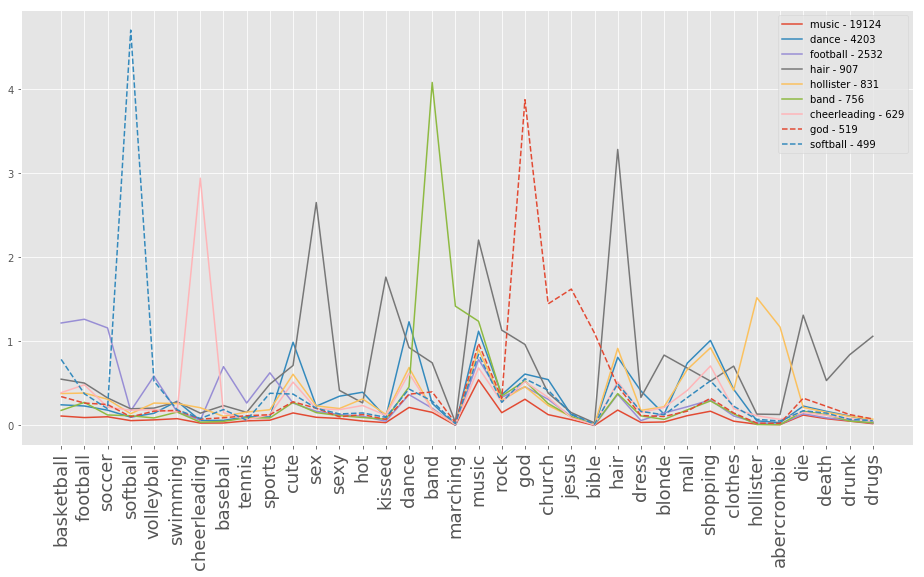

In [203]:
## KMeans

t0 = time.clock()
model = Kmeans(k=9, random_state=1234)
a = model.predict(df_sns.values)
print time.clock() - t0
process(a)

2.34826408131


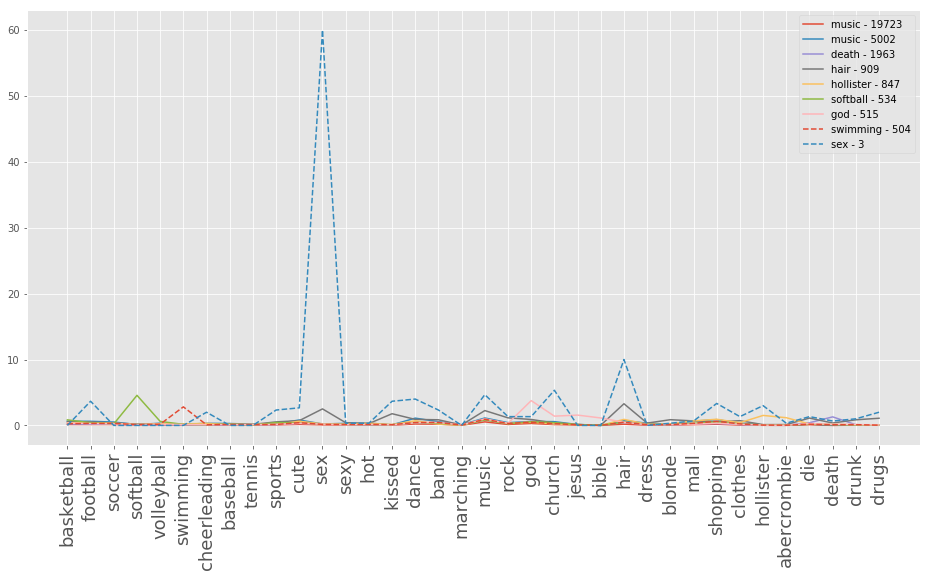

In [204]:
## KMeans++

t0 = time.clock()
model = Kmeans(k=9, init='k-means', random_state=1234)
b = model.predict(df_sns.values)
print time.clock() - t0
process(b)

1.57564232261


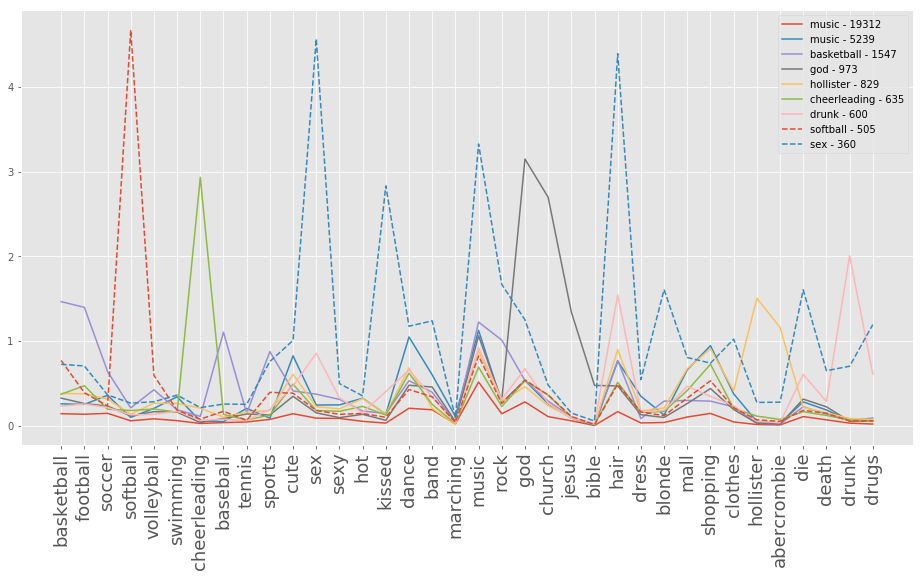

In [205]:
## KMeans с MiniBatchKMeans

t0 = time.clock()
model = MiniBatchKMeans(k=9, random_state=1234)
c = model.predict(df_sns.values)
print time.clock() - t0
process(c)

1.28052092779


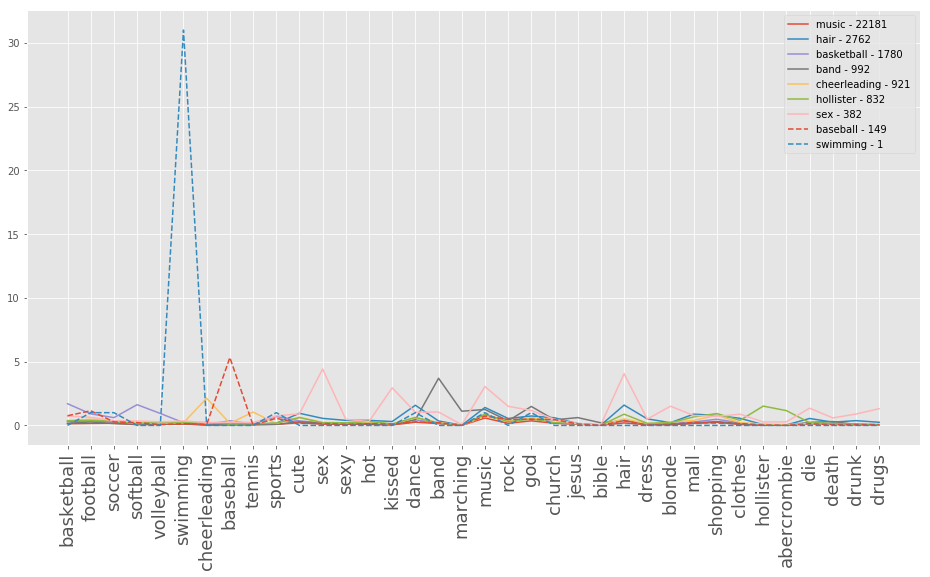

In [206]:
## KMeans++ с MiniBatchKMeans

t0 = time.clock()
model = MiniBatchKMeans(k=9, init='k-means', max_iter=100, random_state=123)
d = model.predict(df_sns.values)
print time.clock() - t0
process(d)

## Вывод
Вообще трудно выбрать, какой алгоритм показал себя лучше всего. Инициализация KMeans++ хоть и дает в среднем лучший результат, но и увеличивает время обучения на треть. Видимо np.choice довольно туго справляется с таким сложным распределением. Minibatch хоть и работает до 3-ех раз быстрее обычного KMeans, но в силу большей стохастичности теряет в качестве. Также возникла проблема переобучения, например при маленьком epsilon(10^-20) стали выделяться группы из 1 человека -- явные выбросы, неинтересные для нашей задачи кластеризации. Еще трудно было подобрать batch size, чтобы сбалансировать между скоростью и качеством работы Minibatch. 

В целом я бы стал использовать простой miniBatch для предварительной оценки данных или в процессе поиска каких-то зависимостей, а для окончательного отчета/вывода/проверки использовал бы Kmeans++.

### Результат анализа:

В итоге у нас вышли неплохие разделения на группы с особенными характеристиками, несмотря на то, что результаты разбиений получались разными в зависимости от инициализации. Мне больше всего понравился результат KMeans++, давайте поближе посмотрим на интересы каждой из получившихся групп:

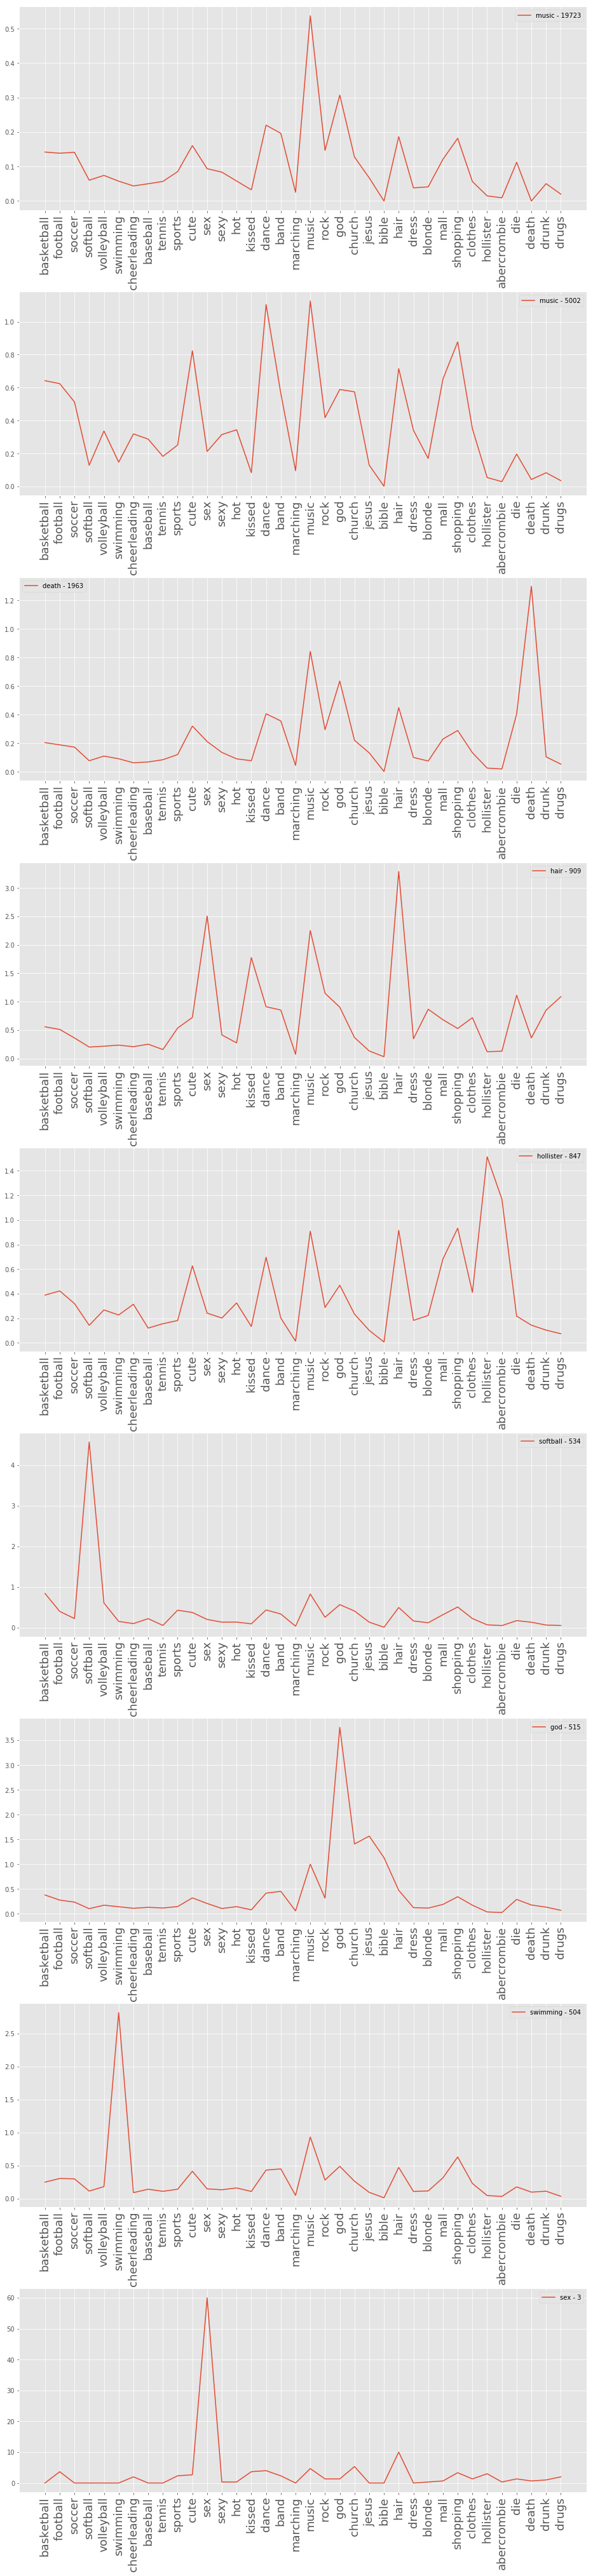

In [207]:
interests = process(b, False)

Основную группу любителей музыки выделили все алгоритмы а также группы верующих и marching band, поскольку у них почти не было сторонних интересов. Остальные группы тоже имели свои интересы, согласованные внутри каждой группы, но они не были так сильно выражены, чтобы выделяться при любой инициализации. В целом кроме названных трех можно было выделить следующие группы: любители шоппинга, спортсмены(баскетболисты, плавцы, футболисты, иногда теннисисты и softball-исты), модники, любители платьев, любители причесок, танцоры.

Хотелось еще посмотреть на характеристики, не попавшие в модель: возраст, пол и количество друзей. Вообще датасет скошен в сторону женского пола: девушек оказалось в 4 раза больше, чем парней.

In [229]:
ages = [df[b == i]["age"].mean() for i in range(9)]
friends = [df[b == i]["friends"].mean() for i in range(9)]
female_to_male = [
    1.0
    * df[b == i]["gender"].value_counts()[0]
    / df[b == i]["gender"].value_counts()[1]
    if df[b == i]["gender"].value_counts().shape[0] == 2
    else 0
    for i in range(9)
]
df_grouped = pd.DataFrame(
    data=[ages, friends, female_to_male],
    columns=interests.values(),
    index=["age", "friends", "female_to_male"],
).T

In [231]:
df_grouped

age    friends  female_to_male
god        18.610808  34.904854        4.359551
death      18.234340  32.306164        4.451039
music      18.142186  27.377427        3.372739
music      17.522202  36.434026        8.375250
swimming   17.704434  32.670635        6.580645
sex        18.088333  29.666667        0.000000
softball   17.439895  41.629213        0.000000
hair       17.632772  30.744774        5.951220
hollister  17.493453  41.382527        9.426667

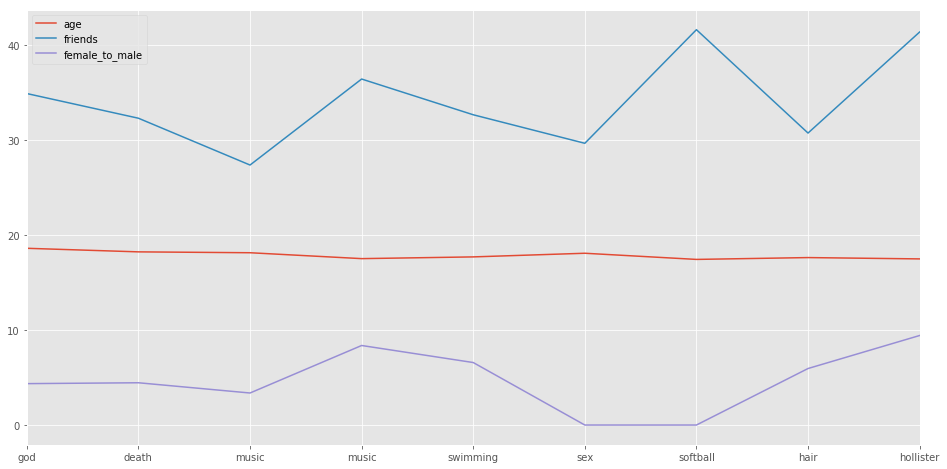

In [242]:
plt.figure(figsize=(16, 8))
df_grouped["age"].plot()
df_grouped["friends"].plot()
df_grouped["female_to_male"].plot()
plt.legend(loc="best")